# Aim: 
predict the number of bicycle rentals.

In [1]:
# Start by loading the bicycle sharing data as a Pandas DataFrame:
import numpy as np
import pandas as pd

# load the training dataset
rental_data = pd.read_csv(r'C:\Users\Ryan\JupyterNotebooks-Anaconda\data\daily-bike-share.csv')

# viewing the first few rows
rental_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


In [2]:
# Create a column for day since yr and mnth are separate columns. 

rental_data['day'] = pd.DatetimeIndex(rental_data['dteday']).day

rental_data.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,day
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,1
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,2
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,3


In [3]:
rental_data.shape

(731, 15)

In [4]:
# demarcate the columns:

# Identify the label column:
label = ['rentals']

# Identify the numeric features:
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']

# identify the categorical features:
categorical_features = ['season','yr','mnth','holiday','weekday','workingday','weathersit', 'day']


# Exploratory Data Analysis:

In [5]:
# generate basic descriptive statistics:
rental_data[numeric_features + ['rentals']].describe()

,temp,atemp,hum,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471
std,0.183051,0.162961,0.142429,0.077498,686.622488
min,0.059130,0.079070,0.000000,0.022392,2.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000
50%,0.498333,0.486733,0.626667,0.180975,713.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000


In [6]:
rental_data[categorical_features].describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,day
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,15.738714
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,8.809949
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,8.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,16.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,23.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,31.000000


In [21]:
# Visually explore trends in the data:

import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'number of bikes rented')

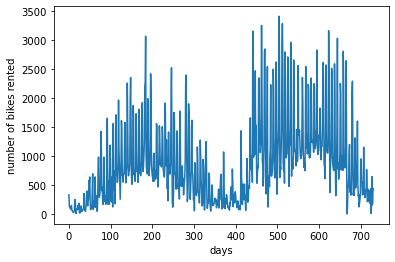

In [22]:
# since the dataframe is already sorted by date:
plt.plot(rental_data.rentals)
plt.xlabel('days')
plt.ylabel('number of bikes rented')

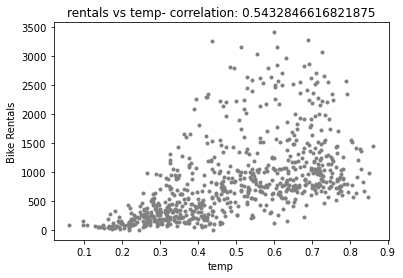

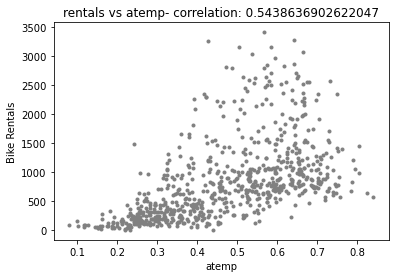

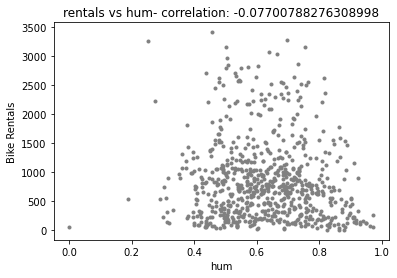

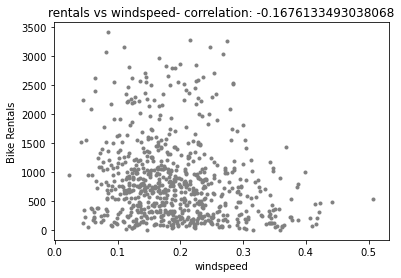

In [35]:
# Relationships between rentals and  numeric features:

for col in numeric_features:
    fig = plt.figure()
    ax = fig.gca()
    feature = rental_data[col]
    label = rental_data['rentals']
    
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label, color='gray', marker='.')
    plt.xlabel(col)
    plt.ylabel('Bike Rentals')
    ax.set_title('rentals vs ' + col + '- correlation: ' + str(correlation))
plt.show()

The fluctuations in rentals shows some periodicity across the 2 years of data. This includes day, mnth, yr, season.

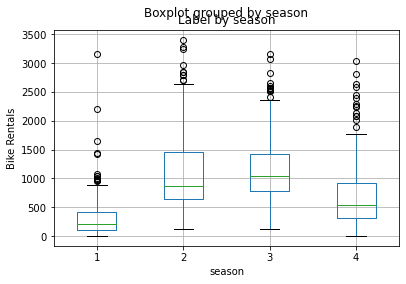

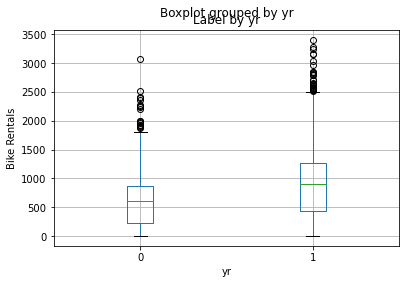

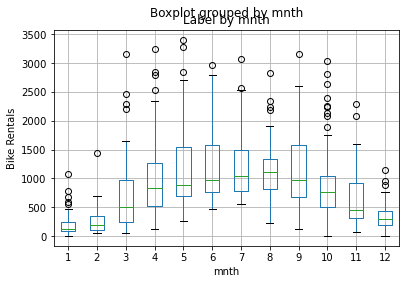

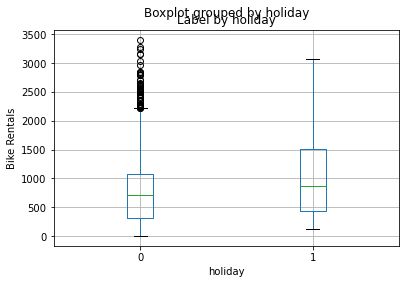

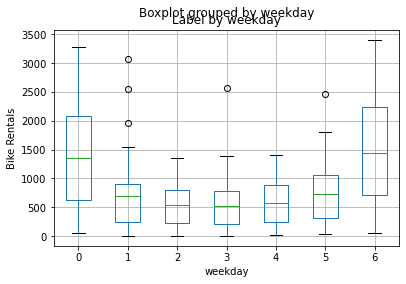

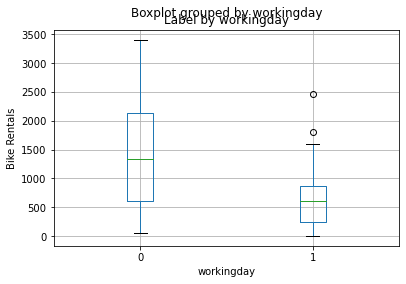

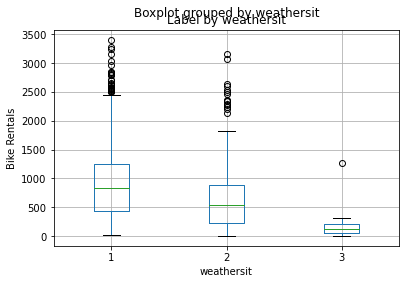

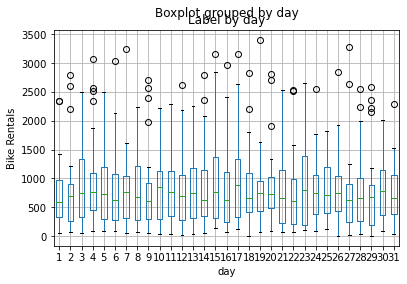

In [36]:
# Relationships between rentals and  categorical features:

for col in categorical_features:
    fig = plt.figure()
    ax = fig.gca()
    rental_data.boxplot(column = 'rentals', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Bike Rentals")
plt.show()

It appears that there is an association between number of bike rentals and:

seasons 2 & 3 (warmer in USA);

Likewise there is an increase in rentals in the middle of the year;

2nd year of the rental program;

Increaased rentals on holidays;

Increased rentals on weekends and non-workdays;

Weathersit has highest for category 1 and lowest for category 3.

Overall there are clear trends that can be used in developing a predictive model.


# Preprocessing:

In [60]:
from sklearn import preprocessing

In [55]:
# split the dataframe for one-hot encoding 
catDF = rental_data[["season","yr","mnth","holiday","workingday","weathersit"]]
numDF = rental_data[["temp","atemp","hum","windspeed"]]
labelDF = rental_data[["rentals"]]

In [58]:
catDF

,season,yr,mnth,holiday,workingday,weathersit
0,1,0,1,0,0,2
1,1,0,1,0,0,2
2,1,0,1,0,1,1
3,1,0,1,0,1,1
4,1,0,1,0,1,1
...,...,...,...,...,...,...
726,1,1,12,0,1,2
727,1,1,12,0,1,2
728,1,1,12,0,0,2
729,1,1,12,0,0,1


In [63]:
enc = preprocessing.OneHotEncoder()
enc.fit(catDF)
cat1H = enc.transform(catDF).toarray()
cat1H.shape

(731, 25)

In [64]:
cat1H

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [66]:
# convert array into dataframe:
catDF2 = pd.DataFrame(cat1H, columns=['season1','season2','season3','season4','yr0','yr1','m1','m2','m3','m4','m5','m6','m7','m8','m9','m10','m11','m12','h0','h1','wd0','wd1','wrs1','wrs2','wrs3'])

In [67]:
catDF2

,season1,season2,season3,season4,yr0,yr1,m1,m2,m3,m4,...,m10,m11,m12,h0,h1,wd0,wd1,wrs1,wrs2,wrs3
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
727,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
728,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
729,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [81]:
# combine dataframes
tRental_data = pd.concat([catDF2, numDF, labelDF], axis=1)  

In [82]:
tRental_data

,season1,season2,season3,season4,yr0,yr1,m1,m2,m3,m4,...,wd0,wd1,wrs1,wrs2,wrs3,temp,atemp,hum,windspeed,rentals
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.344167,0.363625,0.805833,0.160446,331
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.363478,0.353739,0.696087,0.248539,131
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.196364,0.189405,0.437273,0.248309,120
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.200000,0.212122,0.590435,0.160296,108
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.226957,0.229270,0.436957,0.186900,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.254167,0.226642,0.652917,0.350133,247
727,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.253333,0.255046,0.590000,0.155471,644
728,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.253333,0.242400,0.752917,0.124383,159
729,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.255833,0.231700,0.483333,0.350754,364


# Train a model:

In [86]:
# Create numpy array 'X' containing the features, and array 'y' containing the labels:
X, y = tRental_data[['season1','season2','season3','season4','yr0','yr1','m1','m2','m3','m4','m5','m6','m7','m8','m9','m10','m11','m12','h0','h1','wd0','wd1','wrs1','wrs2','wrs3','temp', 'atemp', 'hum', 'windspeed']].values, tRental_data['rentals'].values

In [87]:
# Split the data into a training and testing set, using 'train_test_split' function in scikit-learn.

from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d, rows\nTest Set: %d rows' % (X_train.size, X_test.size))

Training Set: 14819, rows
Test Set: 6380 rows


In [89]:
# Train the model

from sklearn.linear_model import LinearRegression

# Fit a linear regression model on the training set
model = LinearRegression(normalize=False).fit(X_train, y_train)
print (model)

LinearRegression()


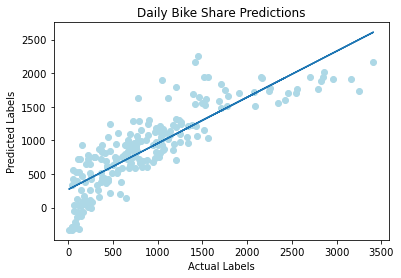

In [92]:
# Evaluate the trained model

plt.scatter(y_test, predictions, color="lightblue")
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test))
plt.show()

In [93]:
#
# Mean Square Error (MSE), or Root Mean Square Error (RMSE), or Coefficient of Determination (R-squared or R^2).

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 147056.5199363728
RMSE: 383.47949089406694
R2: 0.7117049224676109


In [124]:
from sklearn.ensemble import GradientBoostingRegressor

reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)
reg.predict(X_test)

reg.score(X_test, y_test)

0.8402826381443067

In [102]:
importance = reg.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.01225
Feature: 1, Score: 0.00077
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00032
Feature: 4, Score: 0.02268
Feature: 5, Score: 0.02345
Feature: 6, Score: 0.00015
Feature: 7, Score: 0.00034
Feature: 8, Score: 0.01072
Feature: 9, Score: 0.00033
Feature: 10, Score: 0.00042
Feature: 11, Score: 0.00048
Feature: 12, Score: 0.00096
Feature: 13, Score: 0.00808
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00158
Feature: 16, Score: 0.00060
Feature: 17, Score: 0.00071
Feature: 18, Score: 0.00242
Feature: 19, Score: 0.00376
Feature: 20, Score: 0.24306
Feature: 21, Score: 0.14900
Feature: 22, Score: 0.01226
Feature: 23, Score: 0.00015
Feature: 24, Score: 0.00127
Feature: 25, Score: 0.32778
Feature: 26, Score: 0.08642
Feature: 27, Score: 0.04783
Feature: 28, Score: 0.04221


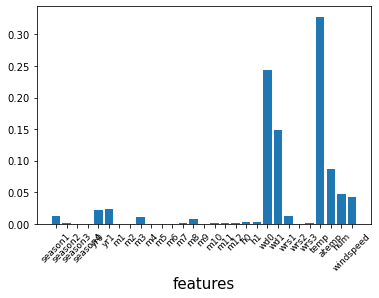

In [123]:
tmp =['season1','season2','season3','season4','yr0','yr1','m1','m2','m3','m4','m5','m6','m7','m8','m9','m10','m11','m12','h0','h1','wd0','wd1','wrs1','wrs2','wrs3','temp', 'atemp', 'hum', 'windspeed']

plt.bar(range(len(importance)), importance)
    
pos = np.arange(len(importance))
plt.xticks(pos, tmp, fontsize=9, rotation=45)

plt.xlabel('features', fontsize=15)
plt.show()

# Save the model

In [42]:
import joblib

# Save the model as a pickle file
filename = (r'C:\Users\Ryan\JupyterNotebooks-Anaconda\data\bike-share.pkl')
joblib.dump(model, filename)

['C:\\Users\\Ryan\\JupyterNotebooks-Anaconda\\data\\bike-share.pkl']

In [43]:
# Load the saved model whenever needed to predict labels for new data, or scoring or inferencing.


# Load the model from the file
loaded_model = joblib.load(filename)

# OR
# Create a numpy array containing a new observation (e.g. tomorrow's seasonal and weather forecast information):

X_new = np.array([[1,1,0,3,1,1,0.226957,0.22927,0.436957,0.1869]]).astype('float64')
print ('New sample: {}'.format(list(X_new[0])))

# Use the model to predict tomorrow's rentals
result = loaded_model.predict(X_new)
print('Prediction: {:.0f} rentals'.format(np.round(result[0])))

New sample: [1.0, 1.0, 0.0, 3.0, 1.0, 1.0, 0.226957, 0.22927, 0.436957, 0.1869]
Prediction: 122 rentals
